In [155]:
from sahi.predict import get_prediction, get_sliced_prediction, predict
from sahi import AutoDetectionModel
from sahi.slicing import slice_image
from resize_image import resize_img_dir, resize_img
from PIL import Image
import numpy as np
import torch

In [156]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
factor = 2
IMG_DIM = 768
MODEL_TO_USE = 'models/best_model.pth'
model = torch.load(MODEL_TO_USE, map_location = device)

In [157]:
image_dir = r"D:\NLP 1\Sat_object_detection\debug_images\2.jpg"
image_in = resize_img_dir(image_path= image_dir, height= IMG_DIM*factor, width=IMG_DIM*factor)
image_in = Image.fromarray(np.uint8(image_in)).convert('RGB')

In [158]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type='torchvision',
    model=model,
    confidence_threshold=0.7,
    image_size=IMG_DIM,
    device="cpu", # or "cuda:0"
    load_at_init=True
)

In [159]:
result = get_sliced_prediction(
image_in,
# image_dir,
detection_model,
slice_height=768,
slice_width=768,
overlap_height_ratio=0.2,
overlap_width_ratio=0.2,
)

Performing prediction on 9 number of slices.
!!! boxes:  [670.8084  637.00977 700.2795  751.0569 ]
!!! boxes:  [ 56.60556 636.45776  85.1389  749.91516]
!!! boxes:  [657.0342 546.0945 667.6549 584.2471]
!!! boxes:  [270.0706  572.3021  279.86063 597.8639 ]
!!! boxes:  [638.97296 592.0748  647.0362  626.29895]
!!! boxes:  [280.8979  539.8922  302.5097  548.38965]
!!! boxes:  [117.11113 572.81506 126.09047 596.24365]
!!! boxes:  [503.8569  546.6293  514.99677 584.31775]
!!! boxes:  [485.17526 589.8622  495.18863 626.515  ]
!!! boxes:  [124.22644 539.5678  148.88272 548.4982 ]
!!! boxes:  [455.89236 543.2979  480.63956 551.6137 ]
!!! boxes:  [479.24258 551.7563  484.806   572.2159 ]
!!! boxes:  [503.3762  590.0172  509.48386 604.07837]
!!! boxes:  [670.3513    22.194668 700.1682   135.73221 ]
!!! boxes:  [ 56.369064  21.837711  84.931076 134.18837 ]
!!! boxes:  [192.47151 311.8526  278.2638  407.55768]
!!! boxes:  [348.8052  271.08783 365.40646 290.3833 ]
!!! boxes:  [638.2855     0.     

In [160]:
result.export_visuals(export_dir="demo_data/", hide_labels=True, )

In [161]:
print(result.object_prediction_list[0].bbox.minx)
print(result.object_prediction_list[0].bbox.miny)
print(result.object_prediction_list[0].bbox.maxx)
print(result.object_prediction_list[0].bbox.maxy)
result.object_prediction_list[0].bbox.area

670.351318359375
633.9510498046875
702.6154174804688
751.056884765625


3778.3142668381333

In [169]:
bboxes = [result.object_prediction_list[i].bbox for i in range(len(result.object_prediction_list))]
bboxes

[BoundingBox: <(670.351318359375, 633.9510498046875, 702.6154174804688, 751.056884765625), w: 32.26409912109375, h: 117.1058349609375>,
 BoundingBox: <(805.8886108398438, 925.9388427734375, 894.2859878540039, 1024.4871215820312), w: 88.39737701416016, h: 98.54827880859375>,
 BoundingBox: <(963.1462097167969, 885.6242065429688, 981.9297637939453, 907.056884765625), w: 18.783554077148438, h: 21.43267822265625>,
 BoundingBox: <(885.0705871582031, 572.3021240234375, 894.8606262207031, 597.8638916015625), w: 9.7900390625, h: 25.561767578125>,
 BoundingBox: <(1271.8569030761719, 546.094482421875, 1282.9967651367188, 584.3177490234375), w: 11.139862060546875, h: 38.2232666015625>,
 BoundingBox: <(877.0471801757812, 937.0760498046875, 1005.5090637207031, 1025.1848754882812), w: 128.46188354492188, h: 88.10882568359375>,
 BoundingBox: <(1253.1752624511719, 589.8621826171875, 1263.1886291503906, 628.7484617233276), w: 10.01336669921875, h: 38.88627910614014>,
 BoundingBox: <(889.7131500244141, 7

In [163]:
result.object_prediction_list[0].score

PredictionScore: <value: 0.9987584352493286>

In [164]:
result.object_prediction_list[0].score.value

0.9987584352493286

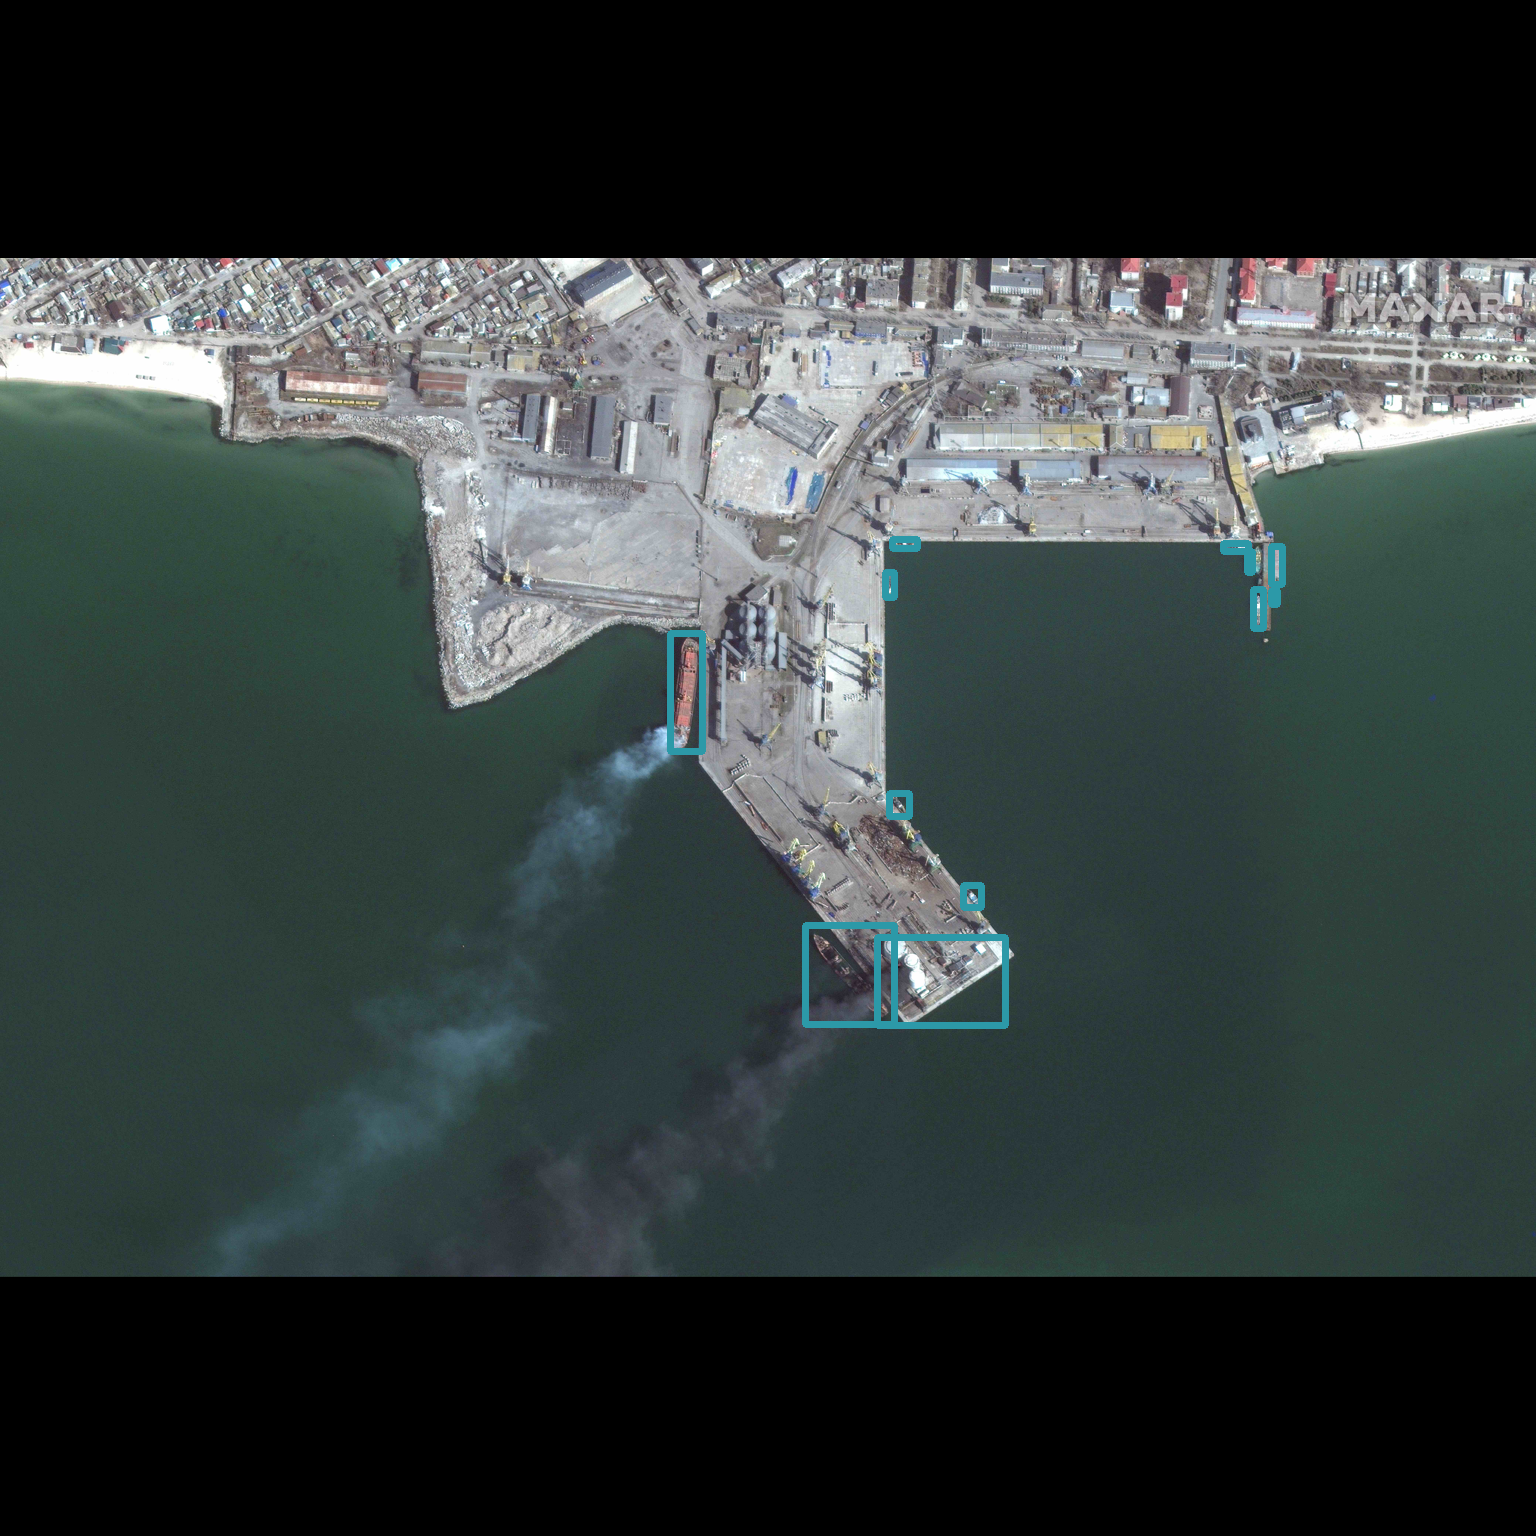

In [165]:
from IPython.display import Image
Image("demo_data/prediction_visual.png")